# Data Categorization and Assignment

In [271]:
#necessary imports
import numpy as np
import tensorflow.keras as keras

from IPython.display import display
import sympy as sp
sp.init_printing(use_latex = True)

import matplotlib.pyplot as plt
%matplotlib inline

#retrieve vector data from gamestate
inputGamestate = np.array(pandas.read_table("test.txt", delim_whitespace = True, header = None))

#Current state of the board
boardState = inputGamestate[0:81, 0:3]

#Coordinate of move made to achieve board state (bottom left of the board being 0, 0)
coordinate = inputGamestate[81, : 2]

#Legality checker for the move
legal = inputGamestate[81, 2]

#Black or white to move from this position(-1 or 1 respectively)
whoseTurn = inputGamestate[82, 0]

#Who won in this position, black or white (-1 or 1 respectively)
positionWinner = inputGamestate[83, 0]

#Move to be made from this position
playersMove = inputGamestate[84, 0]

# Building the Model

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_173 (Dense)            (None, 1000)              82000     
_________________________________________________________________
dense_174 (Dense)            (None, 81)                81081     
Total params: 163,081
Trainable params: 163,081
Non-trainable params: 0
_________________________________________________________________


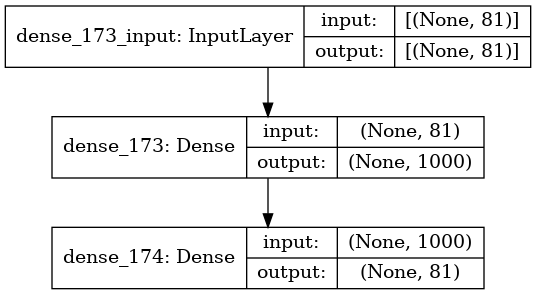

In [275]:
#Creating 81 categories based on every spot on the board, 1 representing the move to be made
Y = keras.utils.to_categorical(playersMove, 81)

#Creating sequential model
model = keras.models.Sequential()

#defining input shape (board state)
input_size = X.shape[0]

#defining output shape 
output_size = Y.shape[0]

#What should the net output? the move that should be made next or state of the board after making a move?
#if the former, we have to format the data to show the next move instead of the move made to produce current board

model.add(keras.layers.Dense(1000, activation = 'relu', input_shape = [input_size]))
model.add(keras.layers.Dense(output_size, activation = 'softmax'))
model.compile(loss = keras.losses.CategoricalCrossentropy(), optimizer = keras.optimizers.SGD(lr = 0.1), metrics = [keras.metrics.CategoricalAccuracy()])
model.summary()
keras.utils.plot_model(model, show_shapes = True, expand_nested = True, show_layer_names = True)

Training

In [141]:
#Train the model
history = model.fit(X, Y, batch_size = 128, epochs = 30, verbose = 0)